# Capstone Project 1 Exploratory Data Analysis
## Molly McNamara

The dataset for this project consists of daily levels of 4 primary air pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) and their air quality indices from major cities across the United States between 2000 and 2016. The data is sourced from the United States Environmental Protection Agency and was obtained from Kaggle(https://www.kaggle.com/sogun3/uspollution).

### Import packages and dataset

In [1]:
import pandas as pd
pd.set_option("display.max.columns", 500)
import matplotlib.pyplot as plt
pollution = pd.read_csv('~/Desktop/cleanpollution.csv', index_col='Unnamed: 0')

In [2]:
pollution.head(3)

,Site_Num,Date_Local,State,County,City,NO2_Mean,NO2_1stMaxValue,NO2_1stMaxHour,NO2_AQI,O3_Mean,O3_1stMaxValue,O3_1stMaxHour,O3_AQI,SO2_Mean,SO2_1stMaxValue,SO2_1stMaxHour,SO2_AQI,CO_Mean,CO_1stMaxValue,CO_1stMaxHour,CO_AQI
0,1,2000-01-01,California,San Diego,Chula Vista,10.913043,20.0,0.0,19.0,0.031625,0.043,9.0,36.0,2.064907,2.65,6.0,4.0,0.603382,0.95,8.0,9.0
1,1,2000-01-02,California,San Diego,Chula Vista,10.869565,35.0,18.0,33.0,0.026833,0.040,9.0,34.0,1.748137,2.00,1.0,3.0,0.560145,1.15,20.5,10.0
2,1,2000-01-03,California,San Diego,Chula Vista,27.782609,45.0,17.0,42.0,0.011333,0.022,9.0,19.0,2.172671,3.00,14.0,4.0,1.174003,2.30,21.0,20.0


To begin with, the describe function was used to evaluate the basic statistics of the Air Quality Values.

In [4]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution[AQI].describe()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
count,412856.000000,412856.000000,412856.000000,412650.000000
mean,24.038367,35.964773,7.245721,6.042532
std,15.274345,19.623752,12.034155,5.942352
min,0.000000,0.000000,0.000000,0.000000
25%,12.000000,25.000000,1.000000,2.000000
50%,23.000000,33.000000,3.000000,5.000000
75%,34.000000,42.000000,9.000000,8.000000
max,132.000000,218.000000,200.000000,201.000000


The dataframe is comprised of 412,856 data points.  The four Air Quality Index values, one for each pollutant, range from 0 to 132-218 (depending on which pollutant).  

### Initial Exploratory Questions

How many states are represented in the dataset?

In [5]:
print("Number of States", pollution['State'].nunique())

Number of States 47


How many cities are represented in the dataset?

In [6]:
print("Number of Cities", pollution['City'].nunique())

Number of Cities 144


How many cities are represented for each state?

In [7]:
print("Number of Cities Per", pollution['City'].groupby(pollution['State']).nunique())

Number of Cities Per State
Alabama                  1
Alaska                   1
Arizona                  3
Arkansas                 1
California              35
Colorado                 3
Connecticut              4
Country Of Mexico        3
Delaware                 1
District Of Columbia     1
Florida                  2
Georgia                  1
Hawaii                   1
Idaho                    1
Illinois                 5
Indiana                  1
Iowa                     2
Kansas                   2
Kentucky                 6
Louisiana                2
Maine                    2
Maryland                 3
Massachusetts            1
Michigan                 2
Minnesota                1
Missouri                 7
Nevada                   2
New Hampshire            2
New Jersey               2
New Mexico               1
New York                 4
North Carolina           3
North Dakota             1
Ohio                     4
Oklahoma                 6
Oregon                   1
P

The number of cities with data collection sites varies by state.  This may in part be a function of population or size of state.

How do the basic statistics vary by state?

In [13]:
pollution[AQI].groupby(pollution['State']).describe()

NO2_AQI                                               \
                         count       mean        std  min   25%   50%   75%   
State                                                                         
Alabama                  782.0  21.228900   9.270030  1.0  14.0  21.5  28.0   
Alaska                   494.0  19.580972  14.421802  1.0   8.0  17.0  27.0   
Arizona                17045.0  36.042534  14.226733  0.0  26.0  36.0  44.0   
Arkansas                3376.0  21.058649  10.343126  1.0  13.0  20.0  28.0   
California            140549.0  23.980181  17.190410  0.0  10.0  22.0  34.0   
Colorado                8778.0  35.938369  16.464654  0.0  27.0  37.0  46.0   
Connecticut             7486.0  18.454315  13.091344  0.0   8.0  17.0  27.0   
Country Of Mexico       2384.0  37.960570  19.530476  3.0  24.0  35.0  48.0   
Delaware                 909.0  21.557756   9.761259  3.0  14.0  21.0  27.0   
District Of Columbia    6433.0  30.593347  12.923655  1.0  22.0  30.0  38.0   
Florida                 6472.0  16.388288   9.951631  0.0   9.0  14.0  22.0   
Georgia                 1931.0  24.139824  11.780511  2.0  15.0  23.0  32.0   
Hawaii                  1378.0   8.490566   4.923701  0.0   5.0   7.0  10.0   
Idaho                    458.0  23.336245   9.806689  0.0  17.0  24.0  30.0   
Illinois               10903.0  29.020958  13.422992  1.0  20.0  27.0  37.0   
Indiana                 3483.0  24.056848  10.868314  2.0  16.0  23.0  31.0   
Iowa                    4588.0  14.668919   8.105475  0.0   8.0  13.0  19.0   
Kansas                  7874.0  21.578359  13.679295  0.0   9.0  21.0  32.0   
Kentucky                3674.0  25.132825  11.376908  0.0  17.0  24.0  32.0   
Louisiana               5970.0  26.739698  12.146351  0.0  18.0  25.0  34.0   
Maine                   5911.0  11.280663  10.441711  0.0   3.0   8.0  17.0   
Maryland                5889.0  19.778231  11.518419  1.0  10.0  20.0  28.0   
Massachusetts           5235.0  29.313658   9.946580  6.0  23.0  28.0  36.0   
Michigan                2047.0  31.851490  13.148540  0.0  23.0  31.0  40.0   
Minnesota                915.0  15.812022  10.496622  0.0   8.0  13.0  22.0   
Missouri                4947.0  29.166363  12.752045  0.0  20.0  27.0  37.0   
Nevada                  2419.0  23.944192  12.935410  0.0  14.0  23.0  34.0   
New Hampshire           2324.0  14.660069   8.576250  0.0   8.0  13.0  20.0   
New Jersey              6663.0  31.687378  13.486741  3.0  22.0  31.0  40.0   
New Mexico              1787.0  24.462787  10.138246  2.0  16.0  24.0  33.0   
New York               16262.0  31.072131  15.107381  0.0  22.0  31.0  41.0   
North Carolina          6067.0  21.981210  11.418643  0.0  13.0  21.0  30.0   
North Dakota            2755.0  12.426134   8.899457  0.0   6.0  10.0  17.0   
Ohio                    3813.0  21.417519  10.626781  0.0  13.0  21.0  28.0   
Oklahoma                8627.0  14.889185   9.134605  0.0   8.0  13.0  21.0   
Oregon                  2949.0  17.244151   7.780141  2.0  11.0  17.0  23.0   
Pennsylvania           47235.0  23.805187  11.227702  0.0  16.0  23.0  30.0   
Rhode Island            1582.0  14.368521   8.723171  1.0   8.0  12.0  20.0   
South Carolina          1632.0   4.935049   3.792690  0.0   3.0   4.0   7.0   
South Dakota            2079.0  11.068302   7.693925  0.0   5.0   8.0  15.0   
Tennessee               1462.0   3.548564   4.501734  0.0   1.0   2.0   5.0   
Texas                  30133.0  23.565227  14.227431  0.0  12.0  23.0  34.0   
Utah                    2163.0  23.485899  15.176701  0.0  10.0  25.0  35.0   
Virginia                9109.0  20.266220  12.145489  0.0  10.0  19.0  28.0   
Washington               241.0  21.717842   9.805359  3.0  14.0  22.0  28.0   
Wisconsin                379.0  26.166227   9.560518  3.0  20.0  26.0  33.0   
Wyoming                 3264.0   9.797488   7.510400  0.0   4.0   8.0  13.0   

                               O3_AQI                                   

The statistics by state show that each area seems to have its own unique profile by pollutant and that the dataset is quite rich in information. 

To better visualize this large dataset, some of the features can be plotted, beginning with a box plot of the four Air Quality Indices. 

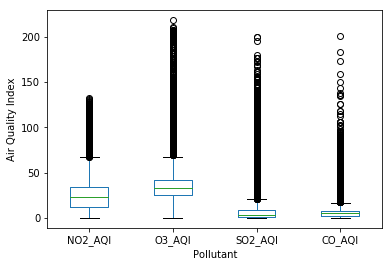

In [14]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
pollution[AQI].plot(kind='box')
plt.xlabel('Pollutant')
plt.ylabel('Air Quality Index')
plt.show()

Per the EPA, Air Quality Index values translate to health concerns as follows (https://airnow.gov/index.cfm?action=aqibasics.aqi):

When the AQI is in this range:	..air quality conditions are:	
0 to 50	    Good	
51 to 100	Moderate	
101 to 150	Unhealthy for Sensitive Groups	
151 to 200	Unhealthy	
201 to 300	Very Unhealthy	
301 to 500	Hazardous	

The box plot shows the dataset includes AQI values in the good/normal range but also many that extend into the realm of unhealthy.

Is there any correlation between the various AQIs?

In [22]:
pollution[AQI].corr()

,NO2_AQI,O3_AQI,SO2_AQI,CO_AQI
NO2_AQI,1.000000,0.041844,0.282732,0.618979
O3_AQI,0.041844,1.000000,0.052191,-0.136562
SO2_AQI,0.282732,0.052191,1.000000,0.158391
CO_AQI,0.618979,-0.136562,0.158391,1.000000


Someting about the correlations - can we correlate to month or city? Add this.

### Top 10 Cities

To further evaluate the data, the dataset was filtered to the 10 most populous cities in the US (in 2016, at the end of the dataset time period - using census data: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population).  

In [17]:
top10cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
top10 = pollution[pollution['City'].isin(top10cities)]

How many data collection sites exist in the 10 most populous cities?

In [18]:
print("Number of Data Collection Sites in 10 Cities:", top10['Site_Num'].nunique())

Number of Data Collection Sites in 10 Cities: 19


The basic statistics were compared amongst the cities.

In [20]:
top10[AQI].groupby(top10['City']).describe()

NO2_AQI                                                       \
                count       mean        std   min   25%   50%   75%    max   
City                                                                         
Chicago         283.0  46.869258  14.459305  11.0  37.0  45.0  55.0   97.0   
Dallas         5187.0  27.086948  13.148091   3.0  16.0  26.0  37.0   97.0   
Houston        8405.0  25.612731  13.192523   0.0  15.0  25.0  34.0  106.0   
Los Angeles    9559.0  37.804373  19.562676   0.0  25.0  37.0  47.0  113.0   
New York      11351.0  35.873227  13.348506   2.0  26.0  35.0  43.0  109.0   
Philadelphia   5041.0  32.914501  12.418849   5.0  25.0  32.0  41.0  106.0   
Phoenix        9055.0  39.892104  13.628428   0.0  32.0  41.0  48.0  105.0   
San Antonio     894.0  19.611857  12.709623   2.0   8.0  18.0  30.0   55.0   
San Diego      7475.0  35.677860  17.234807   4.0  23.0  34.0  44.0  110.0   
San Jose       2609.0  23.388271  10.825011   2.0  14.0  23.0  31.0   67.0   

               O3_AQI                                                      \
                count       mean        std  min   25%   50%   75%    max   
City                                                                        
Chicago         283.0  17.519435   9.214667  1.0  11.0  17.0  23.0   42.0   
Dallas         5187.0  37.075381  23.168898  0.0  24.0  31.0  42.0  206.0   
Houston        8405.0  31.520286  20.635904  1.0  19.0  27.0  37.0  205.0   
Los Angeles    9559.0  34.571922  15.994632  1.0  26.0  34.0  42.0  172.0   
New York      11351.0  28.910228  18.630002  0.0  18.0  26.0  35.0  201.0   
Philadelphia   5041.0  24.672684  14.503270  0.0  15.0  23.0  32.0  147.0   
Phoenix        9055.0  40.718609  18.679091  1.0  29.0  39.0  47.0  147.0   
San Antonio     894.0  33.067114  13.263543  3.0  25.0  31.0  39.0  109.0   
San Diego      7475.0  31.629833  10.387300  1.0  25.0  31.0  37.0  132.0   
San Jose       2609.0  28.152549  11.385656  0.0  22.0  28.0  34.0  136.0   

              SO2_AQI                                                     \
                count       mean        std  min  25%   50%   75%    max   
City                                                                       
Chicago         283.0  17.763251  16.225925  1.0  6.0  13.0  26.0  102.0   
Dallas         5187.0   2.473684   3.260190  0.0  0.0   1.0   4.0   33.0   
Houston        8405.0  10.796193  17.084943  0.0  0.0   4.0  14.0  172.0   
Los Angeles    9559.0   4.052516   4.698502  0.0  1.0   3.0   6.0  100.0   
New York      11351.0  15.254911  15.366478  0.0  4.0  10.0  21.0  176.0   
Philadelphia   5041.0  11.221385  12.064451  0.0  3.0   7.0  16.0  138.0   
Phoenix        9055.0   4.950966   4.341688  0.0  3.0   4.0   6.0   92.0   
San Antonio     894.0   2.605145   4.095940  0.0  0.0   1.0   3.0   39.0   
San Diego      7475.0   8.654582   7.154420  0.0  4.0   7.0  11.0   81.0   
San Jose       2609.0   0.469529   1.040187  0.0  0.0   0.0   1.0   10.0   

               CO_AQI                                                   
                count       mean       std  min  25%   50%   75%   max  
City                                                                    
Chicago         283.0  10.215548  3.942787  2.0  7.0   9.0  13.0  26.0  
Dallas         5181.0   5.146883  3.493381  0.0  3.0   5.0   6.0  42.0  
Houston        8399.0   4.273961  3.990114  0.0  2.0   3.0   6.0  65.0  
Los Angeles    9554.0   9.680867  8.102814  0.0  5.0   8.0  13.0  66.0  
New York      11350.0   7.162291  4.036151  0.0  5.0   7.0   9.0  55.0  
Philadelphia   5028.0   6.456245  4.784876  0.0  3.0   6.0   8.0  51.0  
Phoenix        9051.0  11.087283  8.006165  0.0  6.0   9.0  15.0  59.0  
San Antonio     893.0   4.957447  3.945592  0.0  2.0   3.0   7.0  24.0  
San Diego      7471.0  13.091420  8.120796  0.0  7.0  11.0  17.0  65.0  
San Jose       2609.0   6.001916  4.554585  1.0  3.0   5.0   8.0  28.0

Each pollutant's Air Quality Index was compared visually between the cities.

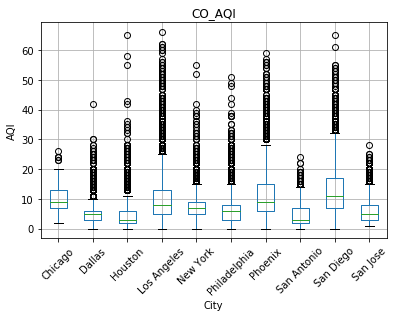

In [24]:
top10.boxplot(column='CO_AQI', by='City', rot=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.suptitle("")
plt.show()

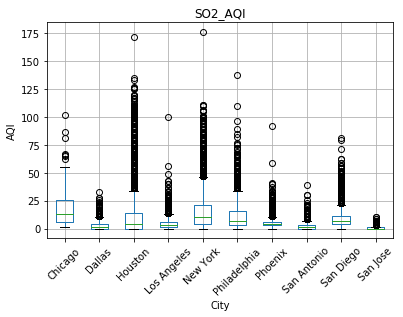

In [25]:
top10.boxplot(column='SO2_AQI', by='City', rot=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.suptitle("")
plt.show()

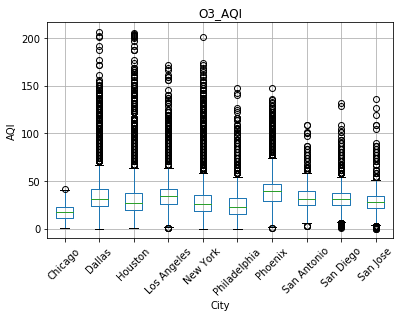

In [26]:
top10.boxplot(column='O3_AQI', by='City', rot=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.suptitle("")
plt.show()

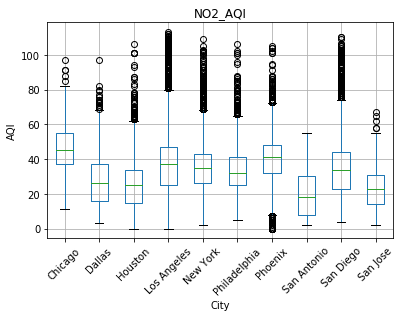

In [27]:
top10.boxplot(column='NO2_AQI', by='City', rot=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.suptitle("")
plt.show()

The boxplots confirmed that each city has its own unique profile of pollutants and some seem more prone to experience dangerous pollutant levels.

### Top 5 Cities

To more easily visualize patterns across time, the dataset was again filtered down to the 5 largest cities in the US.

In [28]:
top5cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
top5 = pollution[pollution['City'].isin(top5cities)]

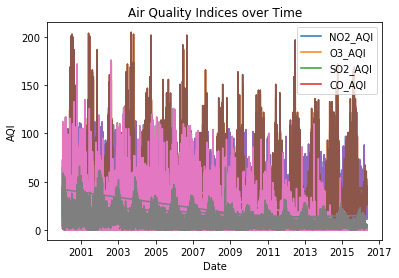

In [33]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
plt.plot_date(top5['Date_Local'], top5[ASI], linestyle='solid', marker='None')
plt.title('Air Quality Indices over Time')
plt.legend(AQI)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

There certainly appear to be seasonal trends for each Air Quality Index value based on this graph.  These trends and changes over time could be interesting to investigate with respect to other companion datasets such as weather data or respiratory hospitalization rates.

Can we look at these values by city over time?

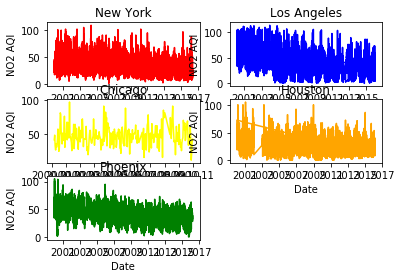

In [36]:
plt.subplot(3, 2, 1)
NY = pollution[(pollution.City=='New York')]
plt.plot_date(NY['Date_Local'], NY['NO2_AQI'], linestyle='solid', marker='None', c='red')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('New York')
plt.subplot(3, 2, 2)
LA = pollution[(pollution.City=='Los Angeles')]
plt.plot_date(LA['Date_Local'], LA['NO2_AQI'], linestyle='solid', marker='None', c='blue')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Los Angeles')
plt.subplot(3, 2, 3)
CHI = pollution[(pollution.City=='Chicago')]
plt.plot_date(CHI['Date_Local'], CHI['NO2_AQI'], linestyle='solid', marker='None', c='yellow')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Chicago')
plt.subplot(3, 2, 4)
HOU = pollution[(pollution.City=='Houston')]
plt.plot_date(HOU['Date_Local'], HOU['NO2_AQI'], linestyle='solid', marker='None', c='orange')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Houston')
plt.subplot(3, 2, 5)
PHX = pollution[(pollution.City=='Phoenix')]
plt.plot_date(PHX['Date_Local'], PHX['NO2_AQI'], linestyle='solid', marker='None', c='green')
plt.xlabel('Date')
plt.ylabel('NO2 AQI')
plt.title('Phoenix')

plt.show()

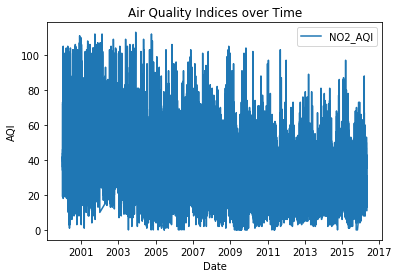

In [35]:
AQI = ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
plt.plot_date(top5['Date_Local'], top5['NO2_AQI'], linestyle='solid', marker='None')
plt.title('Air Quality Indices over Time')
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()